In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Weather Data
1. First, load the dataset from the weatherinszeged table from Thinkful's database.
2. Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.
3. Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

In [2]:
# import dataset
df_w = pd.read_csv(r'C:\Users\AP\Desktop/weatherHistory.csv')

# columns to lower case
df_w.columns = map(str.lower, df_w.columns)

In [ ]:
# sample view of dataset
df_w.head(3)

In [ ]:
df_w.columns

In [3]:
# rename columns/fix typos
df_w.columns = ['date', 'summary', 'precip type', 'temp',
       'apparent temp', 'humidity', 'windspeed',
       'windbearing', 'visibility', 'cloud cover',
       'pressure', 'daily summary']

In [4]:
# define variables for model
X = df_w[['humidity', 'windspeed', 'windbearing', 'pressure']]
Y = df_w.temp

# linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates coefficients using OLS
lrm.fit(X, Y)

# results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818519652


In [5]:
# OLS parameters
# create constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:42:30   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1. Linearity of model in its coefficients

### 2. Error term zero on average

In [ ]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

### 3. Homoscedasticity

In [ ]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

### 4. Low multicolinearity

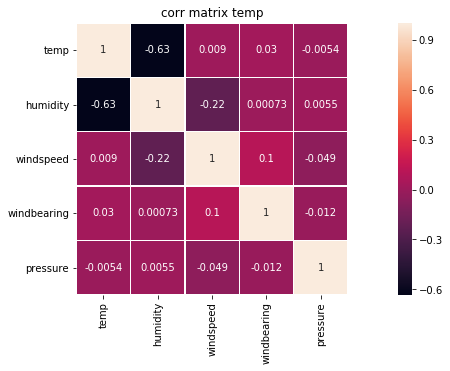

In [6]:
# correlation matrix
corr_temp = df_w[['temp', 'humidity', 'windspeed', 'windbearing', 'pressure']].corr()
plt.figure(figsize=(18,5))
sns.heatmap(corr_temp, square=True, annot=True, linewidths=.5)
plt.title("corr matrix temp")
plt.show()

#### Features are uncorrelated with each other.

### 5. Error terms uncorrelated

In [ ]:
plt.plot(errors)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

### 6. Features not correlated with errors

In [ ]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

----------------------------------------

----------------------------------

------------------------------------

# House prices
1. Load the houseprices data from Thinkful's database.
2. Reimplement the model you built in the previous checkpoint.
3. Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

In [7]:
# import dataset
df = pd.read_csv(r'C:\Users\AP\Downloads\house prices.csv')

# columns to lower case
df.columns = map(str.lower, df.columns)

# convert alpha features to binary
df['mszoning'] = pd.get_dummies(df.mszoning, drop_first=True)
df['neighborhood'] = pd.get_dummies(df.neighborhood, drop_first=True)
df['exterior1st'] = pd.get_dummies(df.exterior1st, drop_first=True)

In [8]:
# define variables for model
X = df[['overallqual', 'grlivarea', 'garagecars', 'mszoning', 'neighborhood', 'exterior1st']]
Y = df.saleprice

# linear regression model
lrm = linear_model.LinearRegression()

# fit method estimates coefficients using OLS
lrm.fit(X, Y)

# results
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 27376.46862964     50.29076183  21328.1723526   -8029.30492406
 -39911.74536606 -21032.87386767]

Intercept: 
 -99533.29696331921


#### The constant is -99,533 and the coefficients are listed in the same order above as in the code.

In [9]:
# OLS parameters
# create constant
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

c:\users\ap\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     688.8
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        11:43:08   Log-Likelihood:                -17561.
No. Observations:                1460   AIC:                         3.514e+04
Df Residuals:                    1453   BIC:                         3.517e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9.953e+04   4872.194    -20.429      0.000   -1.09e+05      -9e+04
overallqual   2.738e+04   1087.034     25.185      0.000    2.52e+04    2.95e+04
grlivarea       50.2908      2.565     19.607      0.000      45.259      55.322
garagecars    2.133e+04   1810.777     11.778      0.000    1.78e+04    2.49e+04
mszoning     -8029.3049   5255.941     -1.528      0.127   -1.83e+04    2280.738
neighborhood -3.991e+04   2.87e+04     -1.389      0.165   -9.63e+04    1.65e+04
exterior1st  -2.103e+04   4.07e+04     -0.516      0.606   -1.01e+05    5.89e+04
==============================================================================
Omnibus:                      415.739   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9565.906
Skew:                           0.771   Prob(JB):                         0.00
Kurtosis:                      15.445   Cond. No.                     6.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## CHECK FOR ALL ASSUMPTIONS

### 1. Linearity of model in its coefficients

### 2. Error term zero on average

In [ ]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

### 3. Homoscedasticity

In [ ]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [ ]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

### 4. Low multicolinearity

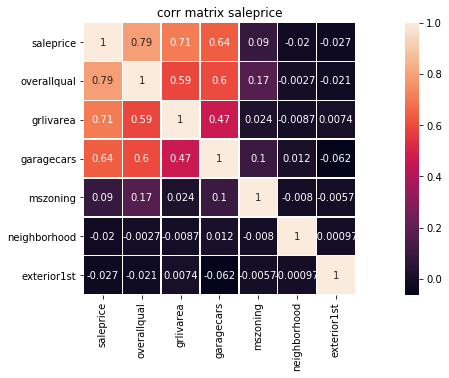

In [10]:
# correlation matrix
corrmat_life = df[['saleprice', 'overallqual', 'grlivarea', 'garagecars', 'mszoning', 'neighborhood', 'exterior1st']].corr()
plt.figure(figsize=(18,5))
sns.heatmap(corrmat_life, square=True, annot=True, linewidths=.5)
plt.title("corr matrix saleprice")
plt.show()

#### There appears to be some correlation between overallqual and grlivarea, overallqual and garagecars, and finally garagecars and grlivarea.

### 5. Error terms uncorrelated

In [ ]:
plt.plot(errors)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

### 6. Features not correlated with errors

In [ ]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [ ]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))